ZADANIE 1

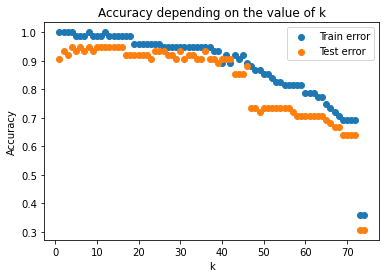

Wartość k dla największej dokładności: 4 i wynosi ona 0.9466666666666667


In [156]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

class KNN:
    def __init__(self, k, X_train, y_train):
        self.k = k
        self.X_train = X_train
        self.y_train= y_train

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [distance.euclidean(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]  
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common


iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5,random_state=10)


k_values = range(1, len(X_train))


train_errors = []
test_errors = []
for k in k_values:
    knn = KNN(k,X_train, y_train)
    y_train_pred = knn.predict(X_train)
    train_error = accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)
    y_test_pred = knn.predict(X_test)
    test_error =accuracy_score(y_test, y_test_pred)
    test_errors.append(test_error)



plt.scatter(k_values, train_errors, label='Train error')
plt.scatter(k_values, test_errors, label='Test error')
plt.title('Accuracy depending on the value of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"Wartość k dla największej dokładności: {k_values[np.argmax(test_errors)]} i wynosi ona {max(test_errors)}")

ZADANIE 2

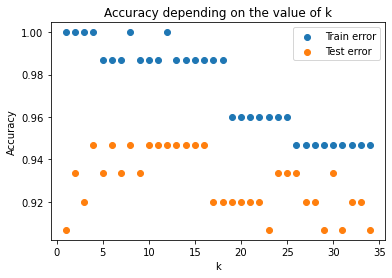

Wartość k dla największej dokładności: 4 i wynosi ona 0.9466666666666667


In [140]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np


train_errors = []
test_errors = []
k_values = list(range(1,35))

for i in k_values:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    y_test_pred = neigh.predict(X_test)
    y_train_pred = neigh.predict(X_train)
    test_error =accuracy_score(y_test, y_test_pred)
    train_error =accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)


plt.scatter(k_values, train_errors, label='Train error')
plt.scatter(k_values, test_errors, label='Test error')
plt.title('Accuracy depending on the value of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"Wartość k dla największej dokładności: {k_values[np.argmax(test_errors)]} i wynosi ona {max(test_errors)}")


Zadanie 3

In [141]:
from sklearn.datasets import load_iris
from sklearn import tree
from six import StringIO  
import pydot 
from graphviz import Source

print(pydot.__version__)

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)


print(f"Point {iris.data[:1, :]} is expected to belong to the class {clf.predict(iris.data[:1, :])}")
print(f"probability of belonging to classes: {clf.predict_proba(iris.data[:1, :])}")



dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("iris.pdf")


1.4.2
Point [[5.1 3.5 1.4 0.2]] is expected to belong to the class [0]
probability of belonging to classes: [[1. 0. 0.]]


True

Zadanie 4

In [143]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.tree import DecisionTreeClassifier
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [144]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
y[np.where(y==10)]=0

print("Number of digits:", X.shape[0])
print("Number of pixels per image:", X.shape[1]*X.shape[2])


Number of digits: 70000
Number of pixels per image: 784


In [145]:
def plot_mnist(images, titles, h, w, n_row=1, n_col=3):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

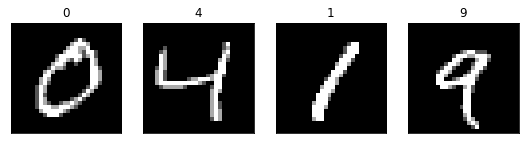

In [146]:
w, h = 28, 28
images, titles = [X[1],X[2],X[3],X[4]], [y[1],y[2],y[3],y[4]]
plot_mnist(images,titles, w, h, 1, len(images))

In [147]:
X_train = X_train.reshape(60000,784)
y_train = y_train.reshape(60000, 1)
X_test= X_test.reshape(10000,784)

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [149]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8662


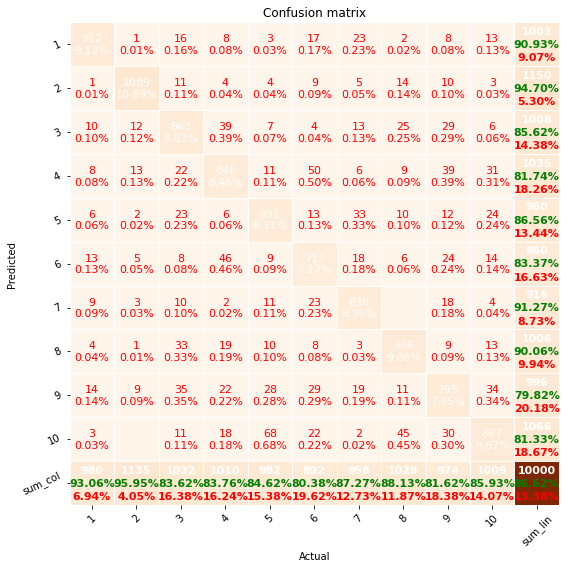

In [150]:
from pretty_confusion_matrix import pp_matrix
import pandas as pd
conf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf_matrix, index = range(1,11), columns = range(1,11))
cmap = "Purd"
pp_matrix(df_cm)

In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.82      0.84      0.83      1010
           4       0.87      0.85      0.86       982
           5       0.83      0.80      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.82      0.81       974
           9       0.81      0.86      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000

